### AutoAugment(AA)

- Auto-augment: 여러 augmentation 기법 중 최적 기법을 강화학습으로 탐색한 기법

In [5]:
from PIL import Image
import cv2
import numpy as np
import torch
from torch.utils.data import Dataset
from torchvision import transforms
import matplotlib.pyplot as plt

In [6]:
class CustomDataset(Dataset):
    def __init__(self, file_path, transform= None):
        self.file_paths = file_path
        self.transform = transform

    def __getitem__(self, index):
        image_path = self.file_paths[index]
        image = Image.open(image_path)

        if self.transform:
            image = self.transform(image)

        return image

    def __len__(self):
        return len(self.file_paths)

In [7]:
torchvision_transform = transforms.Compose([
    transforms.Resize((256,256)),
    transforms.AugMix(),
    transforms.ToTensor()
])

In [8]:
train_dataset = CustomDataset(
    file_path= ["./cat.png"], transform= torchvision_transform
)

In [11]:
for i in range(100) :
    sample = train_dataset[0]


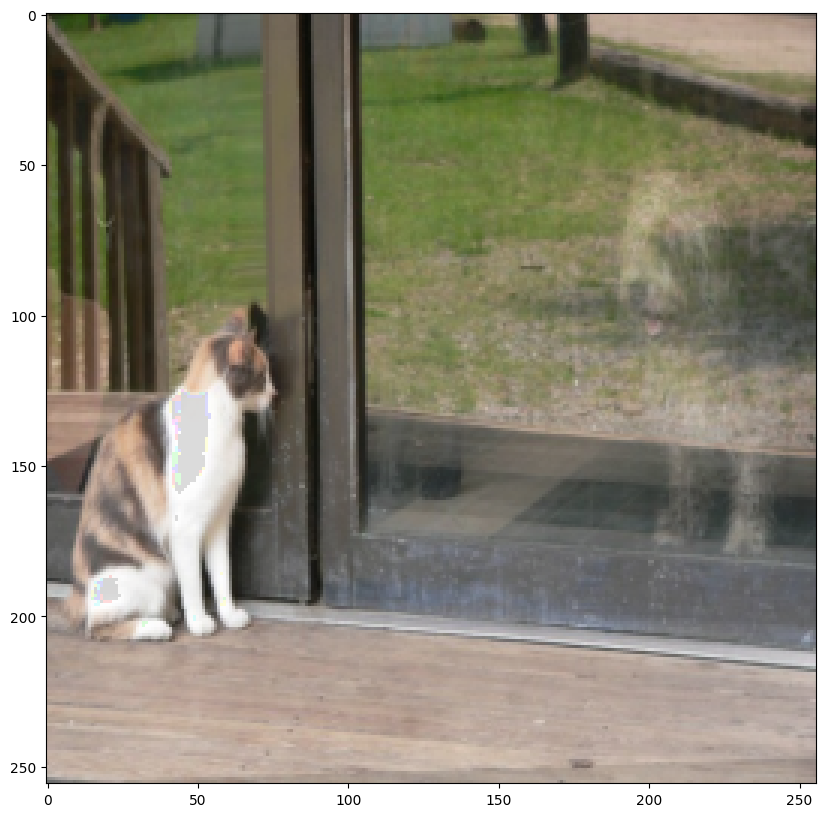

In [12]:
plt.figure(figsize=(10,10))
plt.imshow(transforms.ToPILImage()(sample))
plt.show()